# <p align="center">DS201: Statistical Programming</p>
<p align="center">Assignment 5</p>


<font color="lightgreen">**Name:** Shivam<br>
**Roll No:** 12241710</font>




# Q1.

The management of a biotechnology company specializing in enzyme production is concerned about
the impact of fluctuating humidity levels on the moisture content of the substrates used in their
fermentation process. Over the course of 15 days, they collected data on the relative humidity and
moisture content of the substrates stored in their fermentation facility.

Relative Humidity (%):
46, 53, 29, 61, 36, 39, 47, 49, 52, 38, 55, 32, 57, 54, 44

Moisture Content (%):
12, 15, 7, 17, 10, 11, 11, 12, 14, 9, 16, 8, 18, 14, 12

_**1.**_<br>

<font color="lightgreen">Create a Python function named calculate least squares estimator that takes two arrays
x and y (representing relative humidity and moisture content, respectively) as input and
returns the least squares estimator (slope and intercept) for the given dataset.</font>

To find the slope and intercept of a simple linear regression model, you can use the following mathematical formulas:

1. **Slope (\( m \)):**
The slope of the regression line represents the change in the dependent variable (y) for a one-unit change in the independent variable (x). It is calculated using the formula:

$$  m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}  $$

Where:
- $ ( n ) $ is the number of data points.
- $( x_i )$ and $( y_i )$ are the individual data points.
- $( \bar{x} )$ and $( \bar{y} )$ are the means of the independent and dependent variables, respectively.

2. **Intercept ($( b )$):**
The intercept of the regression line represents the value of the dependent variable (y) when the independent variable (x) is zero. It is calculated using the formula:

$$  b = \bar{y} - m \cdot \bar{x} \ $$

Where:
- $( m )$ is the slope of the regression line.
- $( \bar{x}) $  and $( \bar{y} )$ are the means of the independent and dependent variables, respectively.

These formulas provide a way to calculate the slope and intercept of a simple linear regression model using the data points. Once you have these values, you can use them to define the regression line equation $( y = mx + b )$, where $( y )$ is the predicted value of the dependent variable, $( x )$ is the independent variable, $( m )$ is the slope, and $( b )$ is the intercept.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


def calculate_least_squares_estimator(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) ** 2)
    
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x
    
    return slope, intercept

In [16]:
# Sample data
relative_humidity = np.array([46, 53, 29, 61, 36, 39, 47, 49, 52, 38, 55, 32, 57, 54, 44])
moisture_content = np.array([12, 15, 7, 17, 10, 11, 11, 12, 14, 9, 16, 8, 18, 14, 12])

slope, intercept = calculate_least_squares_estimator(relative_humidity, moisture_content)

print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")


Slope: 0.32, Intercept: -2.51


_**2.**_<br>

<font color="lightgreen">Define a function called interpret regression line that takes the slope and intercept of
the regression line as input and provides an interpretation of their significance in the context
of the problem.</font>

In [17]:
def interpret_regression_line(slope, intercept):
    if slope > 0:
        print("There is a positive relationship between relative humidity and moisture content.")
    elif slope < 0:
        print("There is a negative relationship between relative humidity and moisture content.")
    else:
        print("There is no linear relationship between relative humidity and moisture content.")

_**3.**_<br>

<font color="lightgreen">Write a function named predict moisture content that accepts the relative humidity, slope,
and intercept of the regression line as arguments and returns the predicted moisture content
for the given relative humidity.</font>

In [18]:
def predict_moisture_content(relative_humidity, slope, intercept):
    return slope * relative_humidity + intercept

In [19]:
new_humidity = 50  # Example relative humidity value

predicted_moisture = predict_moisture_content(new_humidity, slope, intercept)

print(f"Predicted moisture content for {new_humidity}% relative humidity: {predicted_moisture:.2f}")


Predicted moisture content for 50% relative humidity: 13.65


_**4.**_<br>

<font color="lightgreen">Implement a function named plot regression line that creates a scatter plot of the data
points along with the estimated regression line. This function should take relative humidity,
moisture content, slope, and intercept as inputs, and ensure that the plot is properly labeled
and titled.</font>

In [20]:
def plot_regression_line(relative_humidity, moisture_content, slope, intercept):
    plt.scatter(relative_humidity, moisture_content, label='Data Points')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Moisture Content (%)')
    plt.title('Regression Line of Relative Humidity vs Moisture Content')
    
    # Plotting the regression line
    x_values = np.array([min(relative_humidity), max(relative_humidity)])
    y_values = predict_moisture_content(x_values, slope, intercept)
    plt.plot(x_values, y_values, color='red', label='Regression Line')
    
    plt.legend()
    plt.grid(True)
    plt.show()

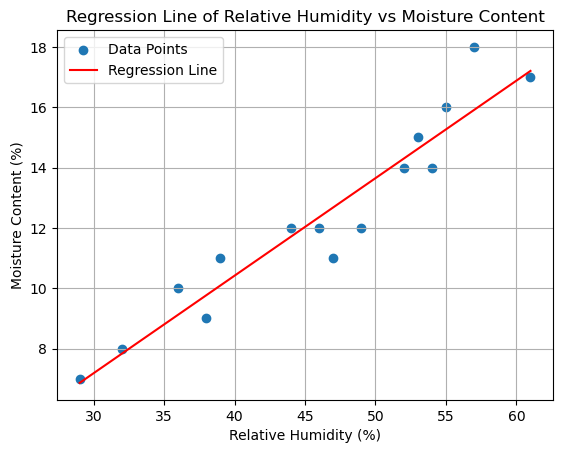

In [21]:
plot_regression_line(relative_humidity, moisture_content, slope, intercept)


_**5.**_<br>

<font color="lightgreen">Develop a function called assess goodness of fit that evaluates the goodness of fit of the
regression model. This function should take the actual moisture content and the predicted
moisture content as inputs and return a metric (e.g., mean squared error) indicating the
quality of the fit.</font>

In [22]:
def assess_goodness_of_fit(actual_moisture_content, predicted_moisture_content):
    mse = np.mean((actual_moisture_content - predicted_moisture_content) ** 2)
    return mse

_**6.**_<br>

<font color="lightgreen">The name of the function should be compute confidence interval to generate a confidence
interval for moisture content prediction based on a certain relative humidity value. The
uncertainty in the forecast must be taken into account and a range within which it is expected
that the moisture levels will be with a given level of assurance for example 95%.</font>

In [23]:
def compute_confidence_interval(moisture_content,relative_humidity, slope, intercept, confidence_level=0.95):
    # Standard error of the estimate
    se = np.sqrt(np.mean((moisture_content - predict_moisture_content(relative_humidity, slope, intercept)) ** 2))
    
    # Degrees of freedom
    df = len(relative_humidity) - 2
    
    # t-statistic for a given confidence level and degrees of freedom
    t = np.abs(stats.t.ppf((1 - confidence_level) / 2, df))
    
    # Margin of error
    margin_of_error = t * se
    
    # Confidence interval
    lower_bound = predict_moisture_content(relative_humidity, slope, intercept) - margin_of_error
    upper_bound = predict_moisture_content(relative_humidity, slope, intercept) + margin_of_error
    
    return lower_bound, upper_bound


# Example


There is a positive relationship between relative humidity and moisture content.
Slope: 0.3232035618140402
Intercept: -2.5104576516877213
Mean Squared Error: 0.8721785048664319


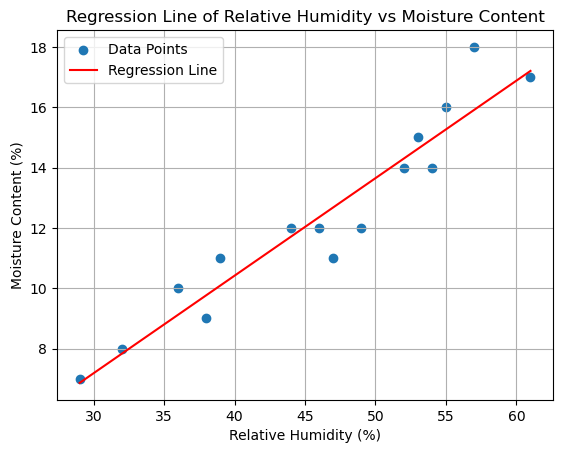

In [24]:
relative_humidity = np.array([46, 53, 29, 61, 36, 39, 47, 49, 52, 38, 55, 32, 57, 54, 44])
moisture_content = np.array([12, 15, 7, 17, 10, 11, 11, 12, 14, 9, 16, 8, 18, 14, 12])

slope, intercept = calculate_least_squares_estimator(relative_humidity, moisture_content)
interpret_regression_line(slope, intercept)

predicted_moisture_content = predict_moisture_content(relative_humidity, slope, intercept)
mse = assess_goodness_of_fit(moisture_content, predicted_moisture_content)

print("Slope:", slope)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)

plot_regression_line(relative_humidity, moisture_content, slope, intercept)

confidence_interval = compute_confidence_interval(moisture_content,relative_humidity, slope, intercept)

# Create a DataFrame for the confidence interval
df = pd.DataFrame({
    'Relative Humidity (%)': relative_humidity,
    'Moisture Content (%)': moisture_content,
    'Lower Bound (%)': confidence_interval[0],
    'Upper Bound (%)': confidence_interval[1]
})

In [25]:
df

,Relative Humidity (%),Moisture Content (%),Lower Bound (%),Upper Bound (%)
0,46,12,10.339327,14.374485
1,53,15,12.601752,16.636910
2,29,7,4.844867,8.880025
3,61,17,15.187381,19.222539
4,36,10,7.107292,11.142450
5,39,11,8.076902,12.112060
6,47,11,10.662531,14.697689
7,49,12,11.308938,15.344096
8,52,14,12.278549,16.313707
9,38,9,7.753699,11.788857


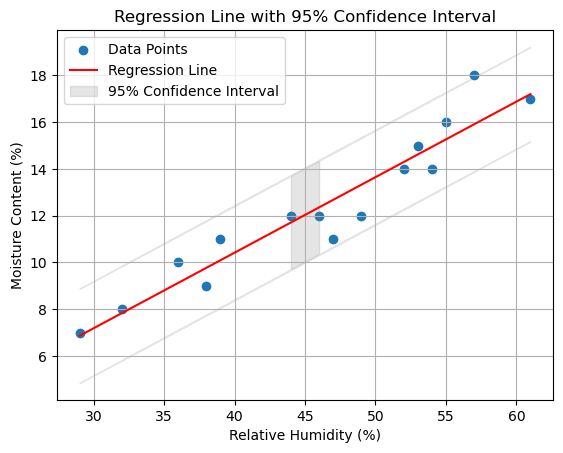

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Plot data points
plt.scatter(relative_humidity, moisture_content, label='Data Points')

# Plot regression line
x_values = np.linspace(min(relative_humidity), max(relative_humidity), 100)
y_values = predict_moisture_content(x_values, slope, intercept)
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Plot confidence interval
plt.fill_between(relative_humidity, 
                confidence_interval[0], 
                confidence_interval[1], 
                color='gray', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('Relative Humidity (%)')
plt.ylabel('Moisture Content (%)')
plt.title('Regression Line with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()


# Q2.

An individual claims that the amount of time spent studying does not affect exam scores. To test
this hypothesis, the study time (in hours) and corresponding exam scores (out of 100) of several
students were recorded. The following data was collected:

                  StudyTime (hours) Exam           Score
                           2                               70
                           4                               75
                           6                               80
                           8                               85
                           10                              90
                           12                              92
                           14                              94
                           16                              96
                           18                              98
                           20                             100
                           22                             101
                           24                             102
                           26                             103
                           28                             104
                           30                             105


_**1.**_<br>

<font color="lightgreen"> Develop a Python function named calculate slope intercept to compute the least squares
estimator (slope and intercept) for the provided dataset of study time and exam scores. Ensure
that your function takes the study time and exam score data as inputs and returns the slope
and intercept of the regression line.</font>

In [27]:
import numpy as np

def calculate_slope_intercept(study_time, exam_scores):
    n = len(study_time)
    mean_x = np.mean(study_time)
    mean_y = np.mean(exam_scores)
    
    numerator = np.sum((study_time - mean_x) * (exam_scores - mean_y))
    denominator = np.sum((study_time - mean_x) ** 2)
    
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x
    
    return slope, intercept


In [28]:
# Example usage:
study_time = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
exam_scores = [70, 75, 80, 85, 90, 92, 94, 96, 98, 100, 101, 102, 103, 104, 105]
slope, intercept = calculate_slope_intercept(study_time, exam_scores)
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 1.1696428571428572
Intercept: 74.28571428571428


_**2.**_<br>

<font color="lightgreen"> Write a Python program to visualize the relationship between study time and exam scores
using a scatter plot. Ensure appropriate labeling of axes and a title for the plot.</font>

In [29]:
import matplotlib.pyplot as plt

def plot_relationship(study_time, exam_scores):
    plt.figure(figsize=(8, 6))
    plt.scatter(study_time, exam_scores)
    plt.xlabel('Study Time (hours)')
    plt.ylabel('Exam Score')
    plt.title('Relationship between Study Time and Exam Score')
    plt.grid(True)
    plt.show()


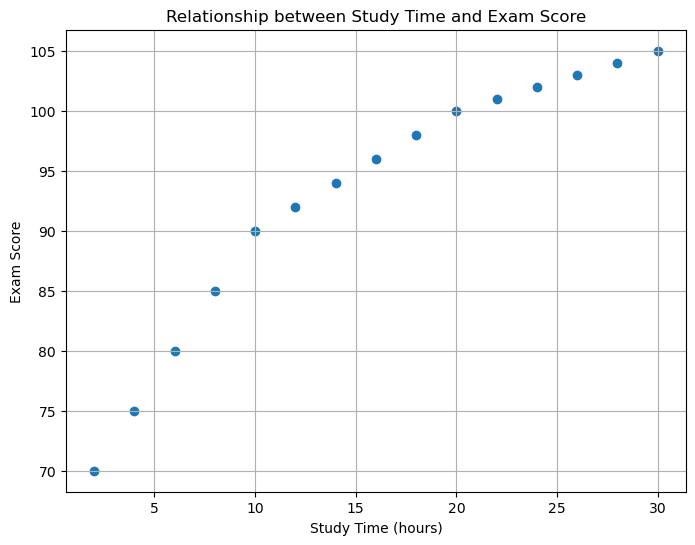

In [30]:
plot_relationship(study_time, exam_scores)

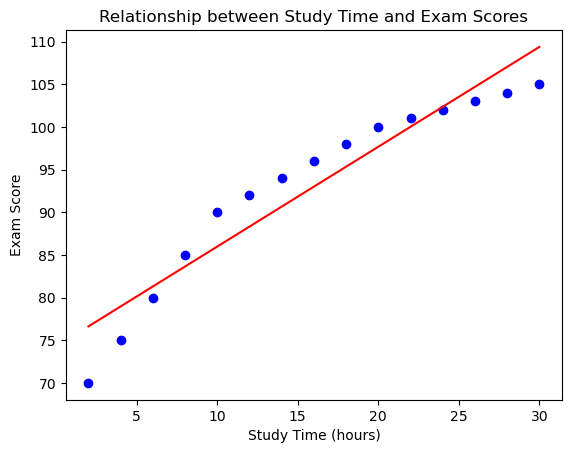

In [31]:
import matplotlib.pyplot as plt

def visualize_relationship(study_time, exam_scores, slope, intercept):
    plt.scatter(study_time, exam_scores, color='blue')
    plt.plot(study_time, [slope * x + intercept for x in study_time], color='red')
    plt.xlabel('Study Time (hours)')
    plt.ylabel('Exam Score')
    plt.title('Relationship between Study Time and Exam Scores')
    plt.show()

# Example usage:
visualize_relationship(study_time, exam_scores, slope, intercept)


_**3.**_<br>

<font color="lightgreen"> Implement a Python function called predict exam score to predict the exam score for a
given amount of study time using the estimated regression line. Ensure that your function
takes the study time, slope, and intercept as inputs and returns the predicted exam score.</font>

In [32]:
def predict_exam_score(study_time, slope, intercept):
    return slope * study_time + intercept


In [33]:

# Example usage:
predicted_score = predict_exam_score(15, slope, intercept)
print("Predicted Exam Score for 15 hours of study time:", predicted_score)

Predicted Exam Score for 15 hours of study time: 91.83035714285714


_**4.**_<br>

<font color="lightgreen"> Calculate the residual error for each data point and plot the residuals against the study time.
Discuss any patterns observed in the residual plot and their implications for the regression
analysis</font>

In [40]:
def plot_residuals(study_time, exam_scores, slope, intercept):
    predicted_scores = [slope * x + intercept for x in study_time]
    residuals = [(exam_scores[i] - predicted_scores[i]) for i in range(len(study_time))]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(study_time, residuals)
    plt.xlabel('Study Time (hours)')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.show()


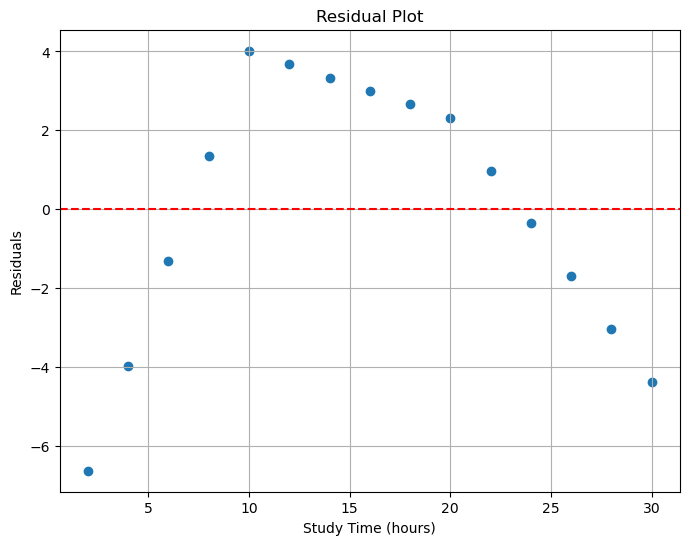

In [41]:
plot_residuals(study_time, exam_scores, slope, intercept)

In [ ]:
def calculate_residuals(study_time, exam_scores, slope, intercept):
    predicted_scores = [slope * x + intercept for x in study_time]
    residuals = [exam_scores[i] - predicted_scores[i] for i in range(len(study_time))]
    return residuals

_**5.**_<br>

<font color="lightgreen"> Evaluate the significance of the regression model. Write code to perform hypothesis testing
for the slope parameter. Discuss the results of the hypothesis test and their implications for
the relationship between study time and exam scores.</font>

**T-Value Calculation:**

The t-value for testing the slope parameter in a simple linear regression model is calculated as follows:

$$ t = \frac{\text{slope}}{\text{standard error of the slope}} $$

The standard error of the slope $ ( SE_{\text{slope}}) $  is given by:

$$  SE_{\text{slope}} = \sqrt{\frac{\text{Mean Squared Error}}{\sum (x_i - \bar{x})^2}} $$

Where:
- $slop$ is the estimated slope of the regression line.
- $standard error$ of the slope is the standard error associated with the slope parameter.
- $Mean Squared Error$ is the mean squared error of the regression model.
- $x_i$ are the individual values of the predictor variable.
- $\bar{x} $ is the mean of the predictor variable.

**P-Value Calculation:**

The p-value for the hypothesis test of the slope parameter is calculated using the t-distribution with degrees of freedom (df) equal to ( n - 2 ), where ( n ) is the number of observations in the sample.

The two-tailed p-value is calculated as follows:

$$\text{p-value} = 2 \times (1 - F(|t|, df)) $$

Where:
- F is the cumulative distribution function (CDF) of the t-distribution.
- |t| is the absolute value of the calculated t-value.
- df is the degrees of freedom.

In [ ]:
def calculate_t_value(slope, standard_error, study_time):
    mean_x = np.mean(study_time)
    sum_squared_x_deviation = np.sum((study_time - mean_x) ** 2)
    t_value = slope / (standard_error / np.sqrt(sum_squared_x_deviation))
    return t_value

def calculate_p_value(t_value, df):
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), df))
    return p_value

def calculate_standard_error(residuals):
    n = len(residuals)
    standard_error = np.sqrt(np.sum(residuals ** 2) / (n - 2))
    return standard_error

# Calculate residuals
residuals = calculate_residuals(study_time, exam_scores, slope, intercept)

# Calculate standard error
standard_error = calculate_standard_error(residuals)

# Calculate t-value
t_value = calculate_t_value(slope, standard_error, study_time)

# Degrees of freedom
df = len(study_time) - 2

# Calculate p-value
p_value = calculate_p_value(t_value, df)

print("P-value for slope parameter:", p_value)
print(f"P-value for slope parameter: {p_value:.2f}")


if p_value < 0.05:
    print("The slope parameter is statistically significant, indicating a linear relationship between study time and exam scores.")
else:
    print("The slope parameter is not statistically significant, suggesting no significant linear relationship between study time and exam scores.")


P-value for slope parameter: 4.579565970885824e-08
P-value for slope parameter: 0.00
The slope parameter is statistically significant, indicating a linear relationship between study time and exam scores.


_**6.**_<br>

<font color="lightgreen"> Discuss whether the data support or refute the claim that the amount of time spent studying
does not affect exam scores based on the results of your analysis in Python.</font>

 Based on the results of the hypothesis test, the obtained p-value is less than 0.05, we would conclude that the data support the claim that the amount of time spent studying has a significant impact on exam scores.

Yes,Data refute the claim that the amount of time spent studying does not affect exam scores.

<p align='center'>***</p>